# PCA
## Principal Component Analysis 

### required modules

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder 

load the iris dataset

In [2]:
iris_df = pd.read_csv("./data/iris/iris.data", names=['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])
iris_df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### shuffle the dataset

In [3]:
iris_df = shuffle(iris_df)
iris_df.head()

,sepal length,sepal width,petal length,petal width,class
123,6.3,2.7,4.9,1.8,Iris-virginica
72,6.3,2.5,4.9,1.5,Iris-versicolor
138,6.0,3.0,4.8,1.8,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
79,5.7,2.6,3.5,1.0,Iris-versicolor


### split features and classes

In [4]:
X_data_df = iris_df.iloc[:, 0:-1]
Y_data_df = iris_df.iloc[:, -1:]

print("Shape of Feature Matrix:", X_data_df.shape) 
print("Shape Label Vector:", Y_data_df.shape) 

Shape of Feature Matrix: (150, 4)
Shape Label Vector: (150, 1)


### one-hot encoding of labels

In [5]:
# Creating the One Hot Encoder 
oneHot = OneHotEncoder(categories='auto') 

oneHot.fit(Y_data_df) 
Y_data = oneHot.transform(Y_data_df).toarray() 

Y_data[0:5]

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])

### normalize the train data

In [6]:
mu = X_data_df.mean()
sigma = X_data_df.std()
X_data_norm = (X_data_df - mu) / sigma
X_data_norm.head()

,sepal length,sepal width,petal length,petal width
123,0.551486,-0.816431,0.646860,0.787951
72,0.551486,-1.277692,0.646860,0.394849
138,0.189196,-0.124540,0.590184,0.787951
147,0.793012,-0.124540,0.816888,1.050019
79,-0.173094,-1.047062,-0.146601,-0.260321


### converti dataframe to numpy array

In [7]:
X_data = X_data_norm.to_numpy()

print("X_data shape: ", str(X_data.shape))
print("Y_data shape: ", str(Y_data.shape))

X_data shape:  (150, 4)
Y_data shape:  (150, 3)


### Compute Covariance Matrix

In [8]:
cov_matrix_x = np.cov(X_data.T)
cov_matrix_x

array([[ 1.        , -0.10936925,  0.87175416,  0.81795363],
       [-0.10936925,  1.        , -0.4205161 , -0.35654409],
       [ 0.87175416, -0.4205161 ,  1.        ,  0.9627571 ],
       [ 0.81795363, -0.35654409,  0.9627571 ,  1.        ]])

### Generate a heatmap for visualizing the covariance matrix

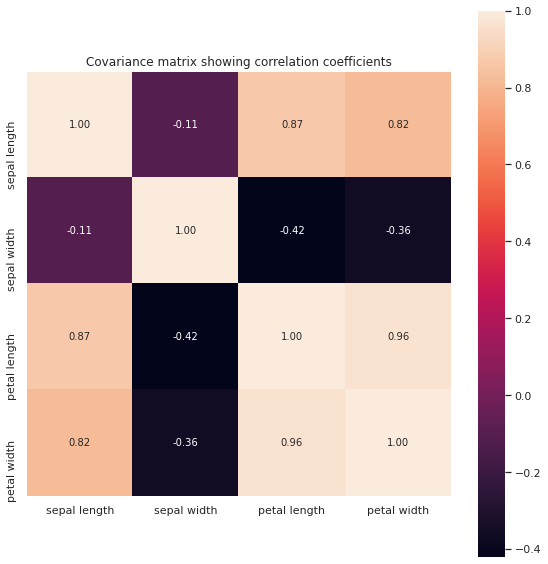

In [9]:
cols =['sepal length', 'sepal width', 'petal length', 'petal width']
plt.figure(figsize=(8,8))
sns.set(font_scale=1)
hm = sns.heatmap(cov_matrix_x,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=cols,
                 xticklabels=cols)
plt.title('Covariance matrix showing correlation coefficients')
plt.tight_layout()
plt.show()

### Compute Eigenvalues and Eigenvectors from Covariance Matrix

In [10]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix_x)


### eigenvalues

In [11]:
eigenvalues

array([2.91081808, 0.92122093, 0.14735328, 0.02060771])

### eigenvectors

In [12]:
eigenvectors

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

### Check variance in Eigenvalues

In [13]:
total_of_eigenvalues = sum(eigenvalues)
varariance = [(i / total_of_eigenvalues)*100 for i in sorted(eigenvalues, reverse=True)]
varariance

[72.77045209380132, 23.030523267680632, 3.6838319576274148, 0.5151926808906252]

### variance 
- 1st component: 72.62%
- 2nd component: 23.14%
- 3rd component: 3.71%
- 4th component: 0.52%

The third and fourth Components have very low variance respectively. These can be dropped. Because these components can’t add any value.


### taking 1st and 2nd Components

In [14]:
feature_vector = eigenvectors[:,0:2]
feature_vector

array([[ 0.52237162, -0.37231836],
       [-0.26335492, -0.92555649],
       [ 0.58125401, -0.02109478],
       [ 0.56561105, -0.06541577]])

### recast the data along the principal component axes

In [15]:
X_data_reduced = feature_vector.T.dot(X_data.T)
X_data_reduced = X_data_reduced.T
print("X_data_reduced shape: ", str(X_data_reduced.shape))


X_data_reduced shape:  (150, 2)


### build the model

In [16]:
def create_model(features, classes):

    # ------ function model ----- #
    #inputs = keras.Input(shape=(features, ), name='input')
    #h1 = keras.layers.Dense(32, activation='relu', name='h1')(inputs)
    #h2 = keras.layers.Dense(32, activation='relu', name='h2')(h1)
    #outputs = keras.layers.Dense(classes, activation='softmax', name='output')(h2)
    #model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # ----- sequential model ---- #
    model = keras.Sequential()
    model.add(keras.Input(shape=(features, ), name='input'))
    model.add(keras.layers.Dense(32, activation='relu', name='h1'))
    model.add(keras.layers.Dense(32, activation='relu', name='h2'))
    model.add(keras.layers.Dense(classes, activation='softmax', name='output'))

    optimizer = tf.keras.optimizers.Adam()

    model.compile(
        loss='categorical_crossentropy', 
        optimizer=optimizer, 
        metrics=['accuracy']
    )

    return model

In [17]:
model = create_model(X_data_reduced.shape[1], Y_data.shape[1])
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
h1 (Dense)                   (None, 32)                96        
_________________________________________________________________
h2 (Dense)                   (None, 32)                1056      
_________________________________________________________________
output (Dense)               (None, 3)                 99        
Total params: 1,251
Trainable params: 1,251
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = model.fit(
    X_data_reduced,
    Y_data,
    epochs=50,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)

Train on 120 samples, validate on 30 samples
Epoch 1/50
120/120 [==============================] - 0s 976us/sample - loss: 1.0742 - acc: 0.4000 - val_loss: 0.9651 - val_acc: 0.5667
Epoch 2/50
120/120 [==============================] - 0s 115us/sample - loss: 0.9174 - acc: 0.6417 - val_loss: 0.8317 - val_acc: 0.7000
Epoch 3/50
120/120 [==============================] - 0s 92us/sample - loss: 0.8005 - acc: 0.7583 - val_loss: 0.7355 - val_acc: 0.7667
Epoch 4/50
120/120 [==============================] - 0s 98us/sample - loss: 0.7196 - acc: 0.7750 - val_loss: 0.6631 - val_acc: 0.8000
Epoch 5/50
120/120 [==============================] - 0s 96us/sample - loss: 0.6582 - acc: 0.7917 - val_loss: 0.6059 - val_acc: 0.8000
Epoch 6/50
120/120 [==============================] - 0s 91us/sample - loss: 0.6085 - acc: 0.8167 - val_loss: 0.5605 - val_acc: 0.8333
Epoch 7/50
120/120 [==============================] - 0s 93us/sample - loss: 0.5698 - acc: 0.8167 - val_loss: 0.5213 - val_acc: 0.8333
Epoch 8/

In [19]:
history_df = pd.DataFrame(history.history)
history_df['epoch'] = history.epoch
history_df.tail()

,loss,acc,val_loss,val_acc,epoch
45,0.230755,0.916667,0.156146,0.966667,45
46,0.228242,0.916667,0.152838,0.966667,46
47,0.229098,0.916667,0.143357,0.966667,47
48,0.223947,0.916667,0.142097,0.966667,48
49,0.220742,0.916667,0.140770,0.966667,49


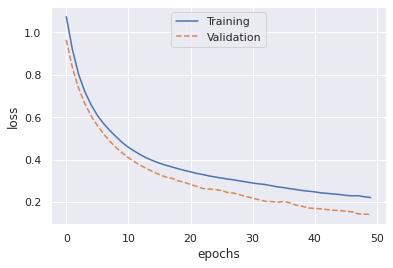

In [20]:
plt.xlabel('epochs')
plt.ylabel('loss')
#plt.ylim([0, 100])
plt.plot(history_df['epoch'], history_df['loss'], label='Training')
plt.plot(history_df['epoch'], history_df['val_loss'], label='Validation', linestyle='dashed')
plt.legend(loc='upper center', shadow=False)